In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.rename(columns={'msrp': 'price'}, inplace=True)

In [8]:
df = df[['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'price']]

### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- **`AUTOMATIC`**
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`

In [9]:
df.groupby(by='transmission_type')['transmission_type'].count().sort_values()

transmission_type
UNKNOWN               19
DIRECT_DRIVE          68
AUTOMATED_MANUAL     626
MANUAL              2935
AUTOMATIC           8266
Name: transmission_type, dtype: int64

In [10]:
df.transmission_type.describe()

count         11914
unique            5
top       AUTOMATIC
freq           8266
Name: transmission_type, dtype: object

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`

In [13]:
corr = df.corr(numeric_only=True)

In [14]:
corr

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.351794,-0.041479,0.258240,0.198171,0.227590
engine_hp,0.351794,1.000000,0.779988,-0.406563,-0.439371,0.662008
engine_cylinders,-0.041479,0.779988,1.000000,-0.621606,-0.600776,0.531312
highway_mpg,0.258240,-0.406563,-0.621606,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.439371,-0.600776,0.886829,1.000000,-0.157676
price,0.227590,0.662008,0.531312,-0.160043,-0.157676,1.000000


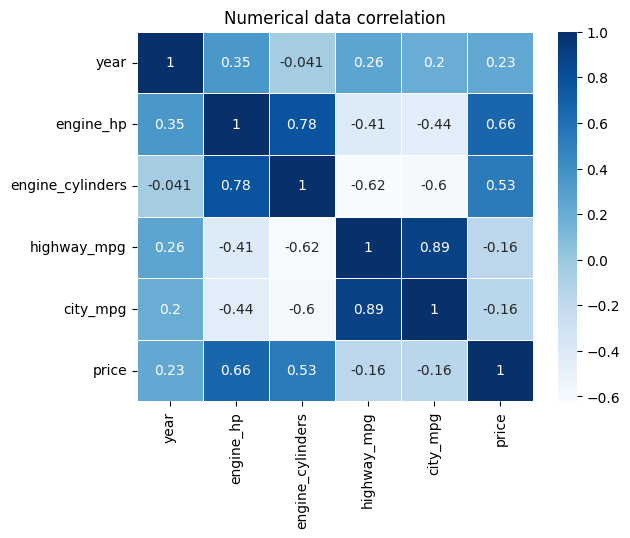

In [22]:
sns.heatmap(corr, annot=True, linewidths=.5, cmap="Blues")
plt.title('Numerical data correlation')
plt.show()

In [17]:
corr.unstack().sort_values(ascending=False)[6:10]

city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.779988
engine_cylinders  engine_hp           0.779988
dtype: float64

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`above_average`) is not in your dataframe.